# EXPLORING CRIME RATES BY RACE IN THE UNITED STATES

### INTRODUCTION

There is a disparity between incarceration rates by race; for example, Black and Hispanic individuals are incarcerated at six and three times the rate of Whites, respectively (Weidner & Schultz, 2019). Therefore, we are interested in investigating the relationship between the racial composition of communities and crime, focussing specifically on violent crime. Thus, our predictive question is, “Can violent crime in a community be predicted based on the racial characteristics of that community?”.

To answer this question, the unnormalized "Communities and Crimes" dataset from the UCI Machine Learning Repository was chosen, which contains various socio-economic, law enforcement and crime statistics from the 1990 US Census, 1990 US LEMAS survey and 1995 FBI UCR (Dua & Graff, 2019). Observations are at the community level, which includes cities, townships, and boroughs. 

### METHODOLOGY

We define our predictor and target variables below, our justification for our variables, and our methodology.

| Variable | Definition | Justification |
| --- | --- | --- |
| Violent crime | The number of violent crimes per 100k population, consisting of murder, rape, robbery, and assault | Minorities are generally more disadvantaged and at risk of incarceration
| Race | The percentage of a community identifying as a certain race, either White, Black, Asian, and Hispanic | The term "disadvantaged" has a broad socioeconomic scope, and predicting by race is more feasible for our project |

| Methodology |
| --- |
| Regression will be performed since these are numerical variables. Four scatter plots will be used to visualize the regression model for each predictor variable, with race on the x-axis and the violent crime on the y-axis, as higher-dimensional plots are not only difficult to visualize but to interpret as well. |

### PRELIMINARY EXPLORATORY DATA ANALYSIS

We begin by loading in the necessary packages for data wrangling and visualization, and setting the seed for our analysis.

In [2]:
# Loads packages
library(tidyverse)
library(repr)
library(tidymodels)

# Set seed
set.seed(100)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Next, we read in the data, using the column names given for the dataset (Dua & Graff, 2019).

In [3]:
# Vector for column names
colnames <- c("communityname", "state", "countyCode", "communityCode", "fold", "population", "householdsize", "racepctblack",
              "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban",
              "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire",
                "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap",
                "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy",
                "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr",
                "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par",
                "PctWorkMomYoungKids", "PctWorkMom", "NumKidsBornNeverMar", "PctKidsBornNeverMar", "NumImmig", "PctImmigRecent",
                "PctImmigRec5", "PctImmigRec8",  "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
                "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous",
                "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup",
                "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart",
                "OwnOccMedVal", "OwnOccHiQuart", "OwnOccQrange", "RentLowQ", "RentMedian", "RentHighQ", "RentQrange", "MedRent",
                "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn",
                "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop",
                "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop",
                "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor",
                "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars",
                "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop", "murdPerPop",
                "rapes", "rapesPerPop", "robberies", "robbbPerPop", "assaults", "assaultPerPop", "burglaries", "burglPerPop",
                "larcenies", "larcPerPop", "autoTheft", "autoTheftPerPop", "arsons", "arsonsPerPop", "ViolentCrimesPerPop", "nonViolPerPop")

In [4]:
# Reads data in and specifies column names
crime <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt",
                  col_names = colnames)
                                
head(crime)

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 2215 Columns: 147
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (42): communityname, state, countyCode, communityCode, LemasSwornFT, Le...
dbl (105): fold, population, householdsize, racepctblack, racePctWhite, race...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,X147
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,⋯,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,⋯,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,⋯,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,⋯,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,⋯,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
Springfieldcity,MO,?,?,1,140494,2.45,2.51,95.65,0.90,⋯,2094,1386.46,7690,5091.64,454,300.6,134,88.72,442.95,6867.42


**Table 1 - Raw dataset**

We will select the relevant columns according to our methodology: racepctblack, racePctWhite, racePctAsian, and racePctHisp and ViolentCrimesPerPop (**Table 1**). For readability, the names of the communities and their states will also be included.

In [5]:
crime_selected <- crime |>
                    select(communityname, state, racepctblack:racePctHisp, ViolentCrimesPerPop)
head(crime_selected)

communityname,state,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BerkeleyHeightstownship,NJ,1.37,91.78,6.50,1.88,16.41
Marpletownship,PA,0.80,95.57,3.44,0.85,4.25
Tigardcity,OR,0.74,94.33,3.43,2.35,60.87
Gloversvillecity,NY,1.70,97.35,0.50,0.70,?
Bemidjicity,MN,0.53,89.16,1.17,0.52,40.05
Springfieldcity,MO,2.51,95.65,0.90,0.95,88.72


| Column Name | Description |
| :- | :- | 
| communityname | the name of the community in which the data is obtained from
| state | the state in which the community is located in
| racepctblack | the percentage of the population that racially identifies as Black
| racePctWhite | the percentage of the population that racially identifies as White
| racePctAsian | the percentage of the population that racially identifies as Asian
| racePctHisp | the percentage of the population that racially identifies as Hispanic
| ViolentCrimesPerPop | the number of violent crimes per 100k population

**Table 2 - Dataset with selected predictor and target variables and description of variables**

The ViolentCrimesPerPop column needs to be converted from character to double type as the values contain decimals (**Table 2**).

In [58]:
crime_w_capita <- crime_selected |>
                mutate(ViolentCrimesPerPop = as.numeric(ViolentCrimesPerPop))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


To perform regression, the dataset needs to be split into training and testing datasets. We will set aside 75% of our data to be our training dataset, and specify the ViolentCrimesPerPop column to be our target variable.

In [7]:
crime_split <- crime_w_capita |>
                initial_split(prop = 0.75, strata = ViolentCrimesPerPop)

crime_training <- training(crime_split)
crime_testing <- testing(crime_split)

For a general overview of the training dataset, we will calculate the following summary statistics.

| Statistic | Description & Reason |
| --- | --- |
| Filter out missing values | Observations with missing values will be exluded, thus, finding the number of observations with missing values will ensure a sufficient quantity of data to train the model
| Computing the predictor and target variables' mean and range | Prevents uneven data distribution from impacting our models
| Determining community count | The community names either contain: borough, town, township, or city. Larger communities tend to lack a majority racial group compared to smaller communities (Farrell & Lee, 2016).

To begin, we apply the filter_all function to subset all rows with missing values, and obtain the number of rows.

In [57]:
cols <- colnames(crime_training)

missing_values <- crime_training |>
                    filter_all(any_vars(is.na(.))) |>
                    summarize(missing = n())

In order to calculate the mean and range, we filter out rows with missing values, and apply the map_dfr function to obtain new dataframes with the calculated means, maximums, and minimums.

In [9]:
crime_data <- crime_training |>
                filter_all(all_vars(!is.na(.)))

head(crime_data)

communityname,state,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Marpletownship,PA,0.80,95.57,3.44,0.85,4.25
NewUlmcity,MN,0.06,99.21,0.47,0.59,7.31
Bellairecity,TX,0.41,94.65,1.98,7.95,6.69
WestMemphiscity,AR,42.15,56.94,0.52,0.50,0.00
Gorhamtown,ME,0.37,98.84,0.40,0.45,0.00
RockSpringscity,WY,1.17,94.31,0.96,7.46,0.00


**Table 3 - Selected dataset with NA values filtered out**

In [56]:
variable_mean <- crime_data |>
                    select(racepctblack:racePctHisp, ViolentCrimesPerPop) |>
                    map_dfr(mean, na.rm = TRUE) |>
                    rename(racepctblack__mean = racepctblack,
                           racePctWhite__mean = racePctWhite,
                           racePctAsian__mean = racePctAsian,
                           racePctHisp__mean = racePctHisp,
                           ViolentCrimesPerPop__mean = ViolentCrimesPerPop)

In [55]:
variable_max <- crime_data |>
                    select(racepctblack:racePctHisp, ViolentCrimesPerPop) |>
                    map_dfr(max, na.rm = TRUE) |>
                    rename(racepctblack__max = racepctblack,
                           racePctWhite__max = racePctWhite,
                           racePctAsian__max = racePctAsian,
                           racePctHisp__max = racePctHisp,
                           ViolentCrimesPerPop__max = ViolentCrimesPerPop)

In [54]:
variable_min <- crime_data |>
                    select(racepctblack:racePctHisp, ViolentCrimesPerPop) |>
                    map_dfr(min, na.rm = TRUE) |>
                    rename(racepctblack__min = racepctblack,
                           racePctWhite__min = racePctWhite,
                           racePctAsian__min = racePctAsian,
                           racePctHisp__min = racePctHisp,
                           ViolentCrimesPerPop__min = ViolentCrimesPerPop)

We can use the str_detect function to filter for rows matching the community type names, and apply the summarize function to the result to obtain their count (**Table 3**).

In [53]:
borough_count <- crime_data |>
                filter(str_detect(communityname, "borough")) |>
                summarize(borough_count = n())

town_count <- crime_data |>
                filter(str_detect(communityname, "town") & !str_detect(communityname, "township")) |>
                summarize(town_count = n())

township_count <- crime_data |>
                filter(str_detect(communityname, "township")) |>
                summarize(township_count = n())

city_count <- crime_data |>
                filter(str_detect(communityname, "city")) |>
                summarize(city_count = n())

We wrangle the individual dataframes and summarize them below.

In [14]:
crime_summary_1 <- tibble(variable_mean, variable_max, variable_min) |>
                pivot_longer(cols = everything(),
                             names_to = "metric",
                             values_to = "value") |>
                separate(col = metric,
                         into = c("variable", "metric"),
                         sep = "__") |>
                pivot_wider(names_from = metric,
                            values_from = value)
                

crime_summary_1

crime_summary_2 <- tibble(city_count, township_count, town_count, borough_count)

crime_summary_2

missing_values

variable,mean,max,min
<chr>,<dbl>,<dbl>,<dbl>
racepctblack,9.089994,96.67,0.00
racePctWhite,83.894425,99.63,2.68
racePctAsian,2.754563,57.46,0.05
racePctHisp,8.374758,95.29,0.12
ViolentCrimesPerPop,31.885795,436.37,0.00


city_count,township_count,town_count,borough_count
<int>,<int>,<int>,<int>
1170,145,208,59


missing
<int>
69


| Column Name | Description |
| :- | :- | 
| variable | the predictor and target variable names from **Table 3**
| mean | the mean of a variable for all communities
| max | the maximum of a variable for all communities
| min | the minumum of a variable for all communities
| city_count | the total count of cities in **Table 3**
| township_count | the total count of townships in **Table 3**
| town_count | the total count of towns in **Table 3**
| borough_count | the total count of boroughs in **Table 3**
| missing | the number of communities with missing values in **Table 2**

**Table 4 - Summary tables with mean, maximum and minimum of predictor and target variables; count for city, township, town and borough and missing rows**

From **Table 4**, our findings are as follows:

| Observation | Explanation |
| --- | --- |
| Only 69 rows have missing data | The quantity of data will be sufficient for training
| The spread of population data is different for each race | Whites have the highest mean, while Asians have the lowest mean and smallest range. The range for Blacks, Hispanics, and violent crime seem to be quite large compared to their relatively low means
| The sum of the means for race is not 100% | This means that some of the population may identify as more than one race
| High city count | Cities are the dominant community type

To confirm that our predictor variables are negatively correlated (one increases when the other decreases) for our analysis, we plot the Black population against White population.

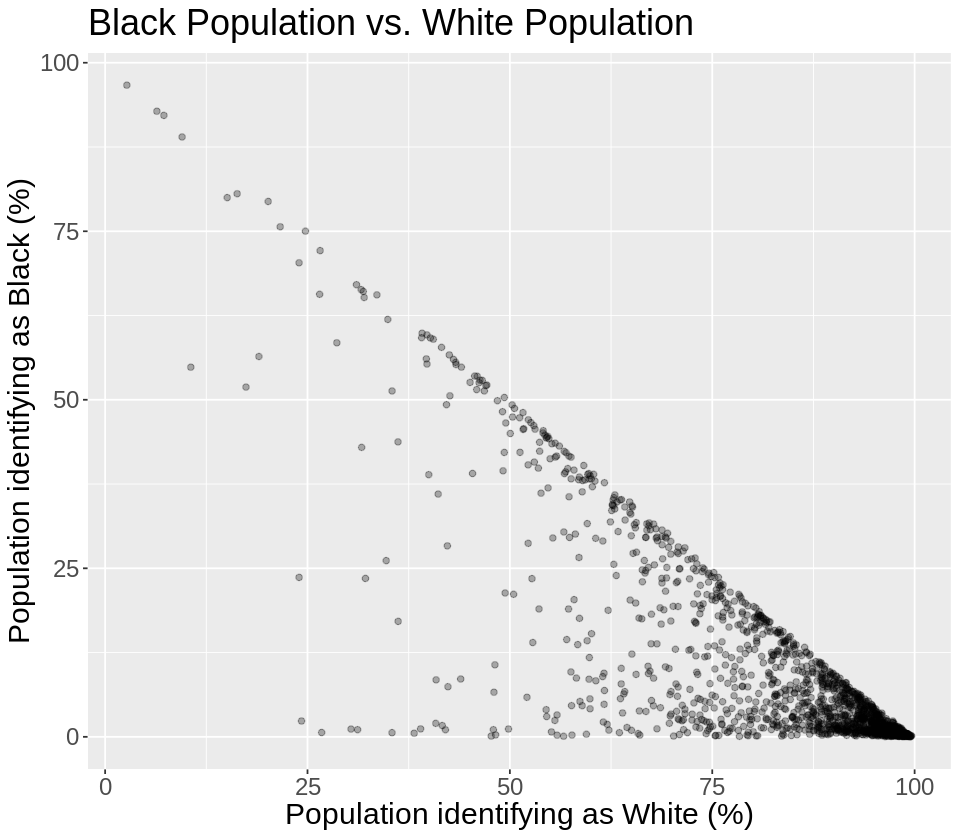

In [15]:
options(repr.plot.width = 8, repr.plot.height = 7)

predictor_plot <- crime_training |>
                    ggplot(aes(x = racePctWhite, y = racepctblack)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population identifying as White (%)", y = "Population identifying as Black (%)", title = "Black Population vs. White Population") +
                    theme(text = element_text(size = 18))

predictor_plot

**Figure 1 - Plot of predictor variables: Black population against White population**

The Black population decreases and converges with increasing White population, supporting our assumption (**Figure 1**).

We now visualize violent crime against every race in scatter plots below, beginning with Blacks. The low mean for racepctBlack and ViolentCrimesPerPop columns (**Table 4**) indicate that the points will be clustered at the bottom left, so we apply logarithmic scaling to both axes.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 69 rows containing missing values (geom_point).”


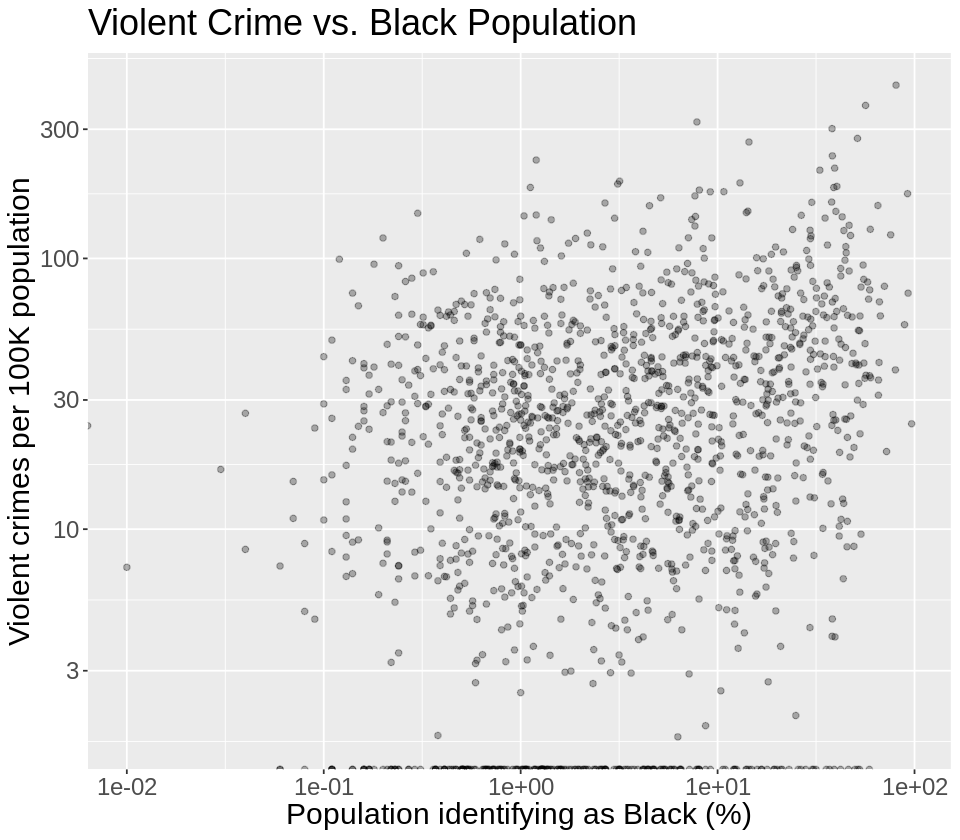

In [16]:
crime_plot_black <- crime_training |>
                    ggplot(aes(x = racepctblack, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population identifying as Black (%)", y = "Violent crimes per 100K population",
                         title = "Violent Crime vs. Black Population") +
                    scale_x_log10() +
                    scale_y_log10() +
                    theme(text = element_text(size = 18))

crime_plot_black

**Figure 2 - Violent Crime vs. Black Population**

The relationship between Black population and violent crime rate is weakly positive (**Figure 2**), with many low crime values and several outliers with a violent crime value of 300.

Next, we plot violent crime against Whites. We apply logarithmic scaling to the y-axis due to the high mean for racePctWhite and low mean for ViolentCrimesPerPop (**Table 4**), meaning that points are clustered at the bottom right.

Warning message:
“Removed 69 rows containing missing values (geom_point).”


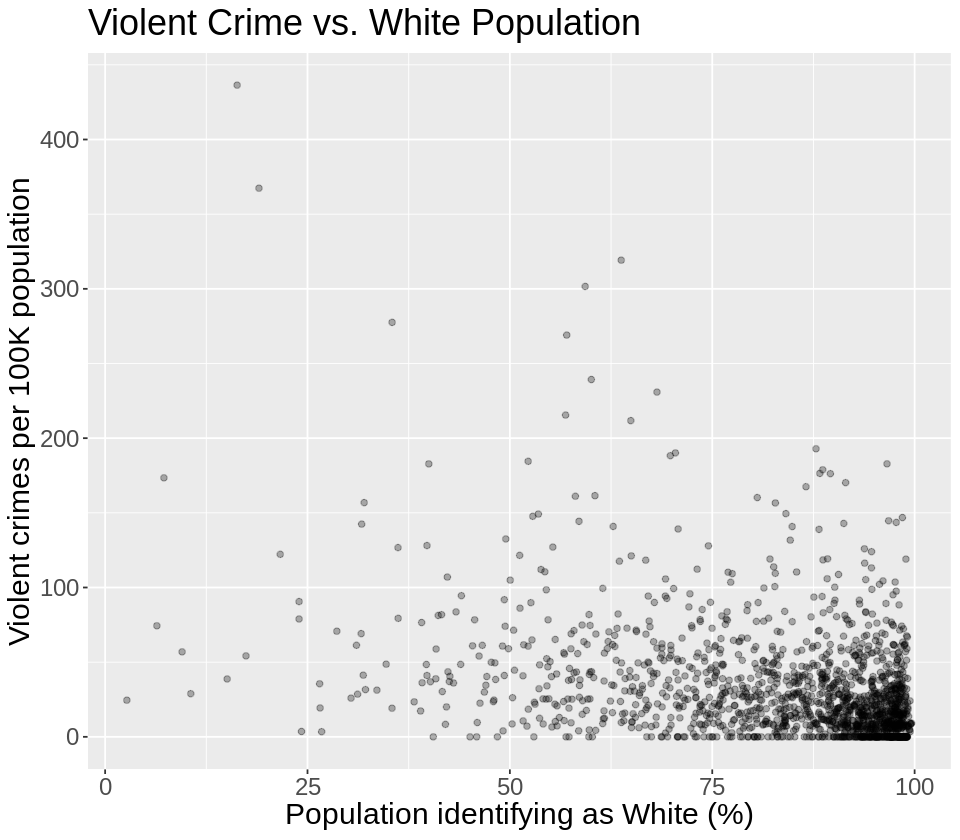

In [17]:
crime_plot_white <- crime_training |>
                    ggplot(aes(x = racePctWhite, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population identifying as White (%)", y = "Violent crimes per 100K population", title = "Violent Crime vs. White Population") +
                    theme(text = element_text(size = 18))

crime_plot_white

**Figure 3 - Violent Crimes vs. White Population**

The relationship between White population and violent crime is weakly negative (**Figure 3**), with many points with low crime values.

We now plot the violent crime against Asians. Again, the low mean for racePctAsian and high mean for ViolentCrimesPerPop (**Table 4**) indicates clustering of points at the bottom left, which requires logarithmic scaling.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 69 rows containing missing values (geom_point).”


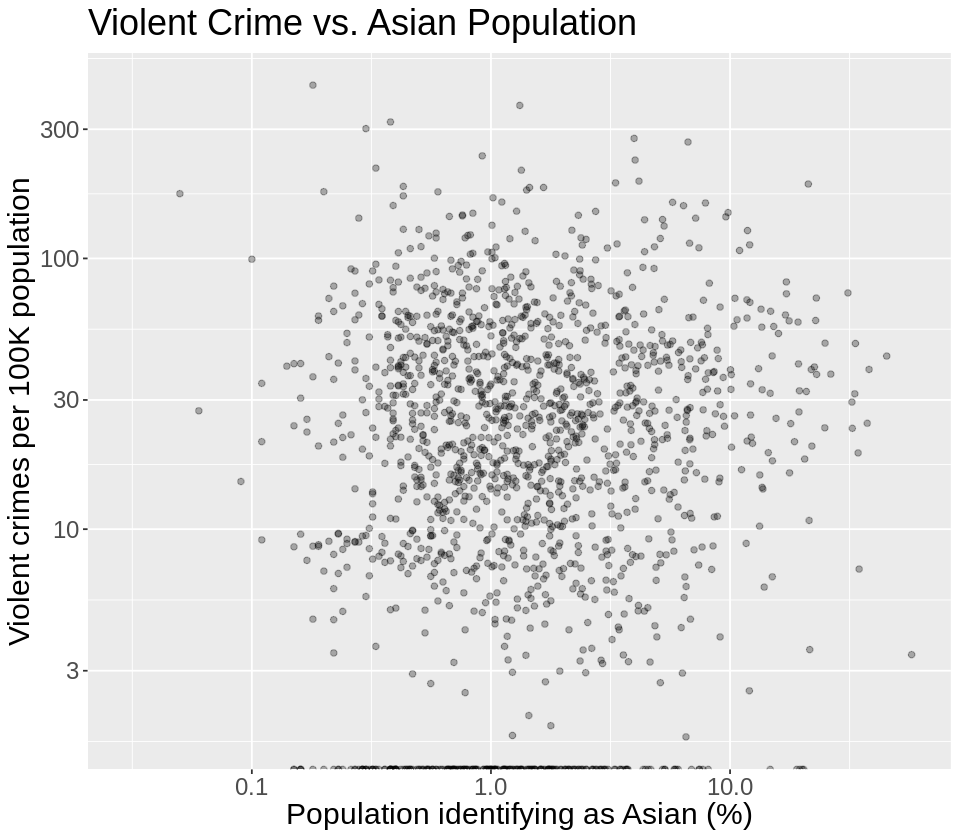

In [18]:
crime_plot_asian <- crime_training |>
                    ggplot(aes(x = racePctAsian, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population identifying as Asian (%)", y = "Violent crimes per 100K population",
                         title = "Violent Crime vs. Asian Population") +
                    scale_x_log10() +
                    scale_y_log10() +
                    theme(text = element_text(size = 18))

crime_plot_asian

**Figure 4 - Violent Crime vs. Asian Population**

The relationship between Asian population and violent crime seems unclear (**Figure 4**). There are also several outliers and many points with low violent crime values, while the range of the Asian population percentage is much lower.

Lastly, we plot violent crime against Hispanics. Because of the low mean for racePctHispanic and high mean for ViolentCrimesPerPop (**Table 4**), points will be clustered at the bottom right, necessitating logarithmic scaling.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 69 rows containing missing values (geom_point).”


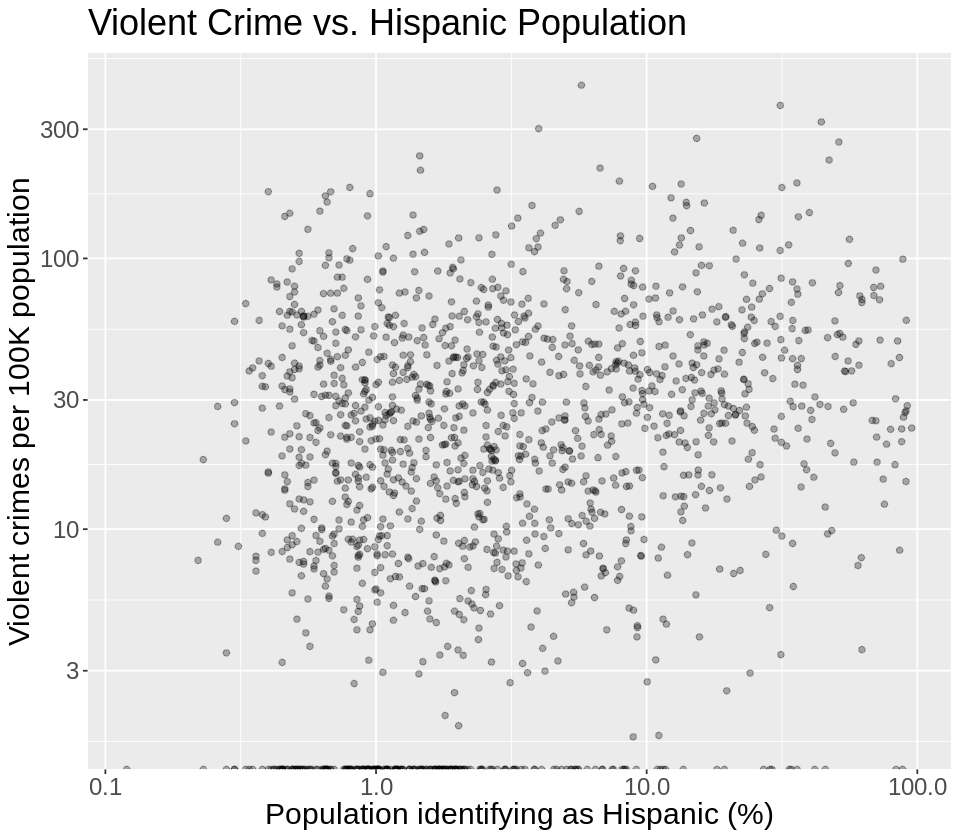

In [19]:
crime_plot_hispanic <- crime_training |>
                    ggplot(aes(x = racePctHisp, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population identifying as Hispanic (%)", y = "Violent crimes per 100K population",
                         title = "Violent Crime vs. Hispanic Population") +
                    scale_x_log10() +
                    scale_y_log10() +
                    theme(text = element_text(size = 18))

crime_plot_hispanic

**Figure 5 - Violent Crime vs. Hispanic Population**

There may be a very weak positive relationship between Hispanic population and violent crime (**Figure 5**). We also see several outliers, and many points with low violent crime values.

The overall relationship with violent crime seems to be weakly negative for Whites and weakly positive to unclear for the other groups, but we must consider the real world context. Violent crime tends to be quite infrequent, hence, a small increase in violent crime can be considered significant in the real world.

### TUNING THE MODELS

We begin by tuning our models, using both linear regression and k-nearest neighbours regression and choosing the one with the maximum accuracy. To do so, we will compare their respective root mean squared errors (RMSE) and weigh their respective advantages.

We determine the coefficients and RMSE for the linear regression model for Blacks, adding a model and recipe to our workflow. With linear regression, no scaling or centering of variables is necessary.

In [40]:
lin_spec <- linear_reg() |>
            set_engine("lm") |>
            set_mode("regression")

black_lin_recipe <- recipe(ViolentCrimesPerPop ~ racepctblack, data = crime_training)

black_lin_fit <- workflow() |>
                add_recipe(black_lin_recipe) |>
                add_model(lin_spec) |>
                fit(data = crime_training)

black_lin_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  racepctblack  
     24.2112        0.8443  


**Figure 6 - Coefficients for the linear model for the Black population**

In [49]:
black_lin_rmse <- black_lin_fit |>
            predict(crime_training) |>
            bind_cols(crime_training) |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse") |>
            select(.estimate) |>
            pull()

black_lin_rmse

[1] 36.57789

**Figure 7 - Linear model RMSE for the Black population**

We have an intercept of 24.21 violent crimes per 100k — our base crime value (**Figure 6**). We also have a 0.84 increase in violent crimes per 100k per percentage increase in Black population, meaning that the total increase from 0% to 100% is quite large. From **Figure 2**, the outliers have less influence than expected on our linear model, perhaps due to the large number of observations. The RMSE of 36.58 is quite high in context of the model coefficients (**Figures 7, 6**), indicating a relatively high uncertainty for predictions.

The predictor variables need to be scaled and centered for k-nn regression. To maximize the accuracy, we will use 5 fold cross-validation to choose the optimal value of k from 1 to 50, given the large number of observations in our training set.

In [62]:
options(repr.plot.width = 12, repr.plot.height = 10)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("regression")

black_knn_recipe <- recipe(ViolentCrimesPerPop ~ racepctblack, data = crime_training) |>
                    step_center(all_predictors()) |>
                    step_scale(all_predictors())

vfold <- vfold_cv(crime_training, v = 5, strata = ViolentCrimesPerPop)

kvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

black_knn_metrics <- workflow() |>
                add_recipe(black_knn_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = vfold, grid = kvals) |>
                collect_metrics() |>
                filter(.metric == "rmse") |>
                select(neighbors, mean)

With our RMSE values for each k from 1 to 50, we plot RMSE against k below.

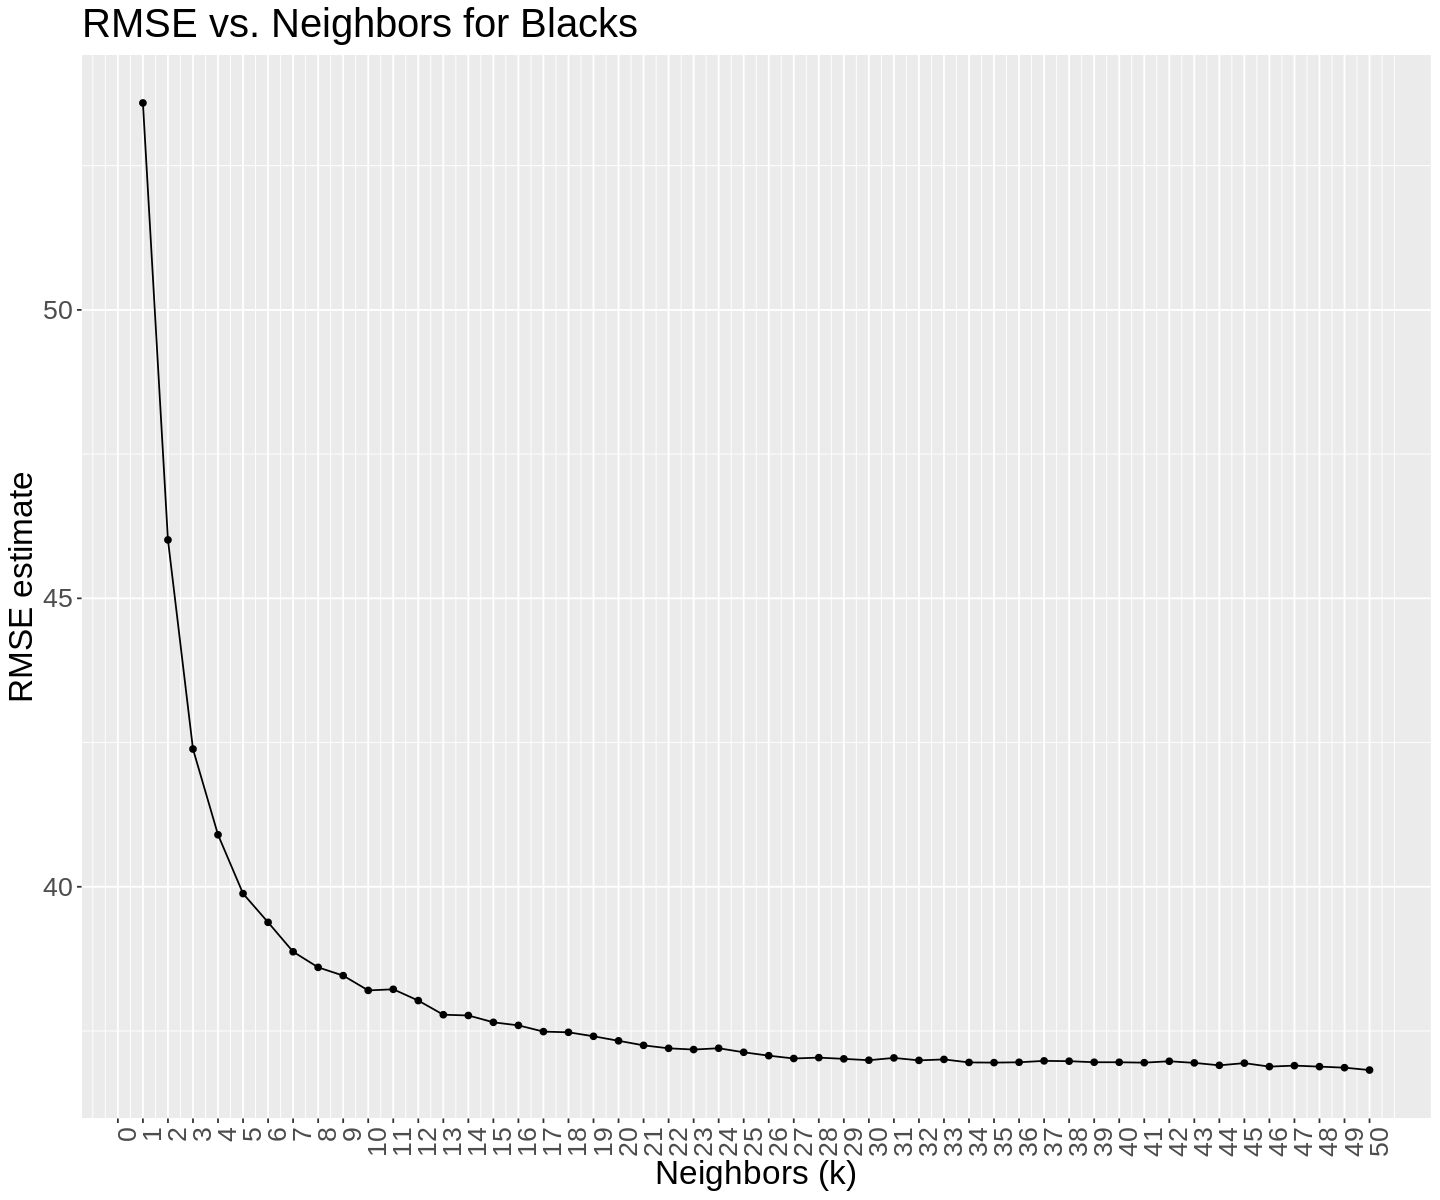

In [22]:
black_k_plot <- black_knn_metrics |>
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors (k)", y = "RMSE estimate", title = "RMSE vs. Neighbors for Blacks") +
                scale_x_continuous(breaks = seq(0, 50, by = 1)) +
                theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 20))

black_k_plot

**Figure 8 - Plot of RMSE against k for the Black population**

The RMSE decreases significantly from k = 1 to k = 5, but approaches RMSE = 37 which is slightly greater than the linear model (**Figure 8**). The optimal value of k is 15 — k is small and uncertainty is low as RMSE does not change significantly for neighboring k values.

Next, we build the Caucasian models.

In [43]:
white_lin_recipe <- recipe(ViolentCrimesPerPop ~ racePctWhite, data = crime_training)

white_lin_fit <- workflow() |>
                add_recipe(white_lin_recipe) |>
                add_model(lin_spec) |>
                fit(data = crime_training)

white_lin_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  racePctWhite  
    100.8983       -0.8226  


**Figure 9 - Coefficients for the linear model for the White population**

In [50]:
white_lin_rmse <- white_lin_fit |>
            predict(crime_training) |>
            bind_cols(crime_training) |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse") |>
            select(.estimate) |>
            pull()

white_lin_rmse

[1] 35.9806

**Figure 10 - Linear model RMSE for the white population**

We have an intercept of 100.90 violent crimes per 100k, and a -0.82 decrease in violent crimes per 100k per percentage increase in White population, meaning a large decrease over the population range 0%-100% (**Figure 9**). From **Figure 3**, the outliers seem to have minimal influence on the model, but the RMSE of 35.98 is significant compared to the model coefficients (**Figures 10, 9**), meaning a relatively high uncertainty for predictions.

For our k-nn model, we apply the same centering and scaling as for the Black model, and use the same vfold object and values for k as before collecting the metrics for the model.

In [61]:
white_knn_recipe <- recipe(ViolentCrimesPerPop ~ racePctWhite, data = crime_training) |>
                    step_center(all_predictors()) |>
                    step_scale(all_predictors())

white_knn_metrics <- workflow() |>
                add_recipe(white_knn_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = vfold, grid = kvals) |>
                collect_metrics() |>
                filter(.metric == "rmse") |>
                select(neighbors, mean)

We plot the calculated RMSE against each k value below.

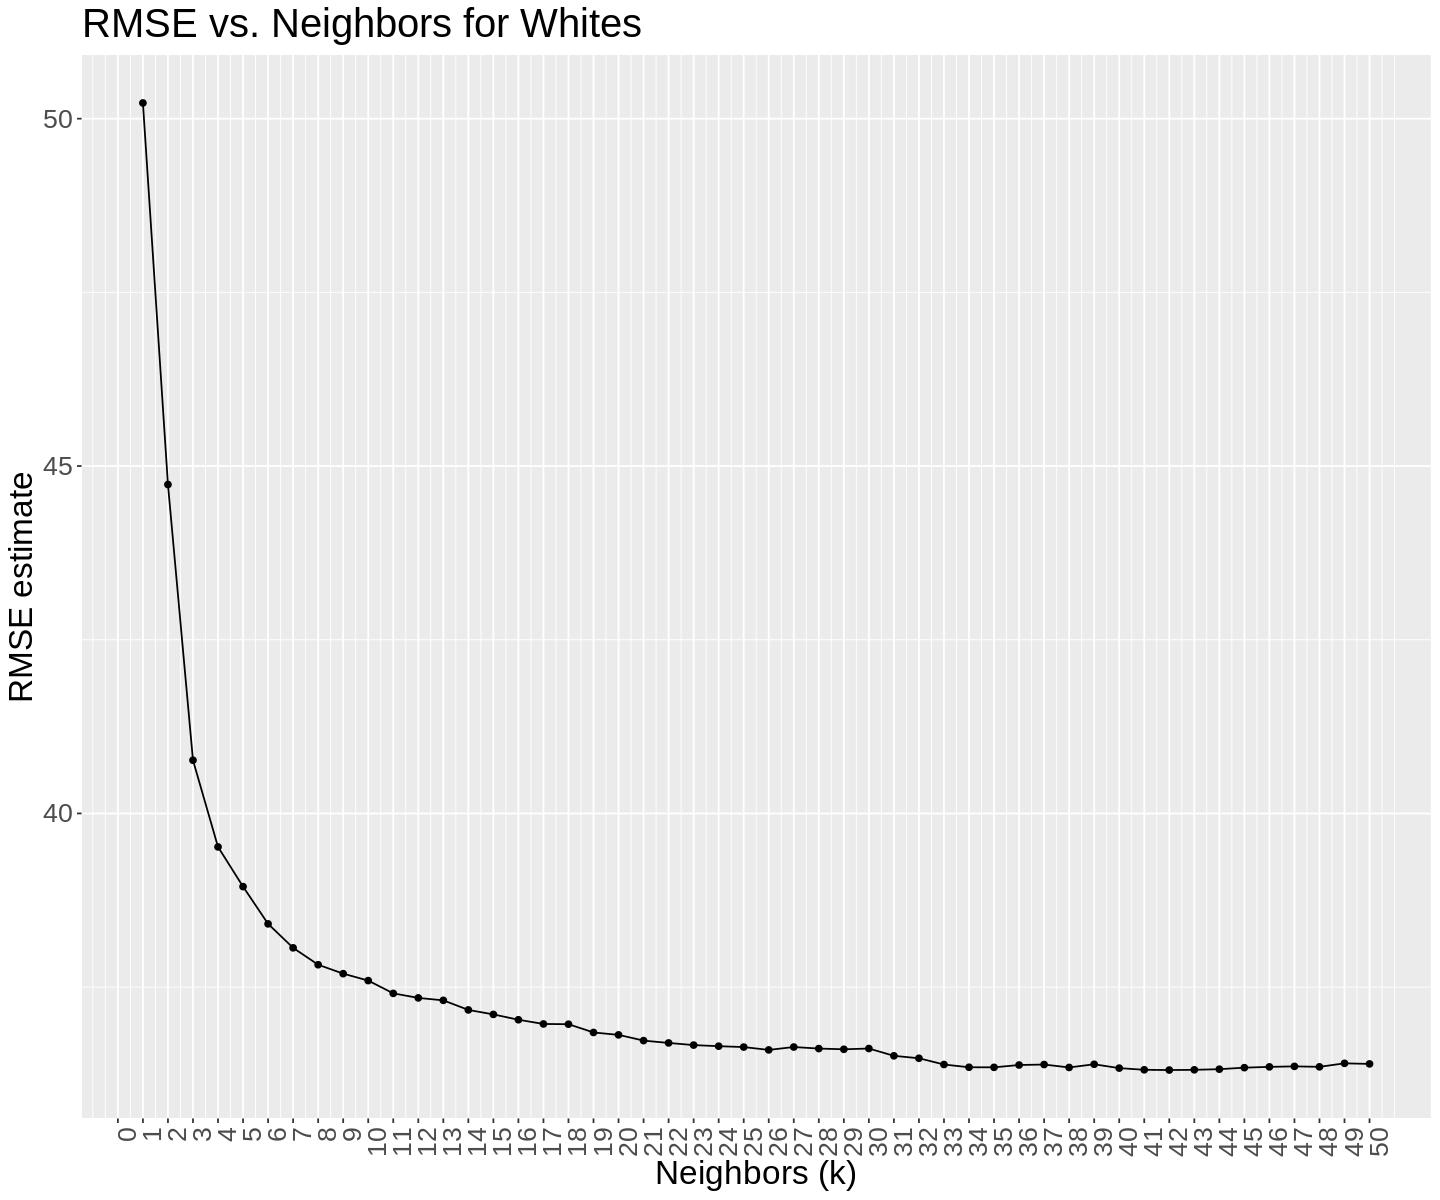

In [25]:
white_k_plot <- white_knn_metrics |>
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors (k)", y = "RMSE estimate", title = "RMSE vs. Neighbors for Whites") +
                scale_x_continuous(breaks = seq(0, 50, by = 1)) +
                theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 20))

white_k_plot

**Figure 11 - Plot of RMSE against k for white population**

RMSE decreases most significantly from k = 1 to k = 5, approaching RMSE = 36 which is higher than the linear model (**Figure 11**). The optimal value of k is 15, as the RMSE does not fluctuate significantly for neighboring k values and k is small.

Next, we make the models for Asians.

In [45]:
asian_lin_recipe <- recipe(ViolentCrimesPerPop ~ racePctAsian, data = crime_training)

asian_lin_fit <- workflow() |>
                add_recipe(asian_lin_recipe) |>
                add_model(lin_spec) |>
                fit(data = crime_training)

asian_lin_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  racePctAsian  
      31.136         0.272  


**Figure 12 - Coefficients for the linear model for the Asian population**

In [51]:
asian_lin_rmse <- asian_lin_fit |>
            predict(crime_training) |>
            bind_cols(crime_training) |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse") |>
            select(.estimate) |>
            pull()

asian_lin_rmse

[1] 38.42634

**Figure 13 - Linear model RMSE for the Asian population**

The linear model has an intercept of 31.14 violent crimes per 100k with a 0.27 increase in violent crimes per 100k per percentage increase in Asian population, meaning a smaller total increase for violent crime over the population range 0%-100% compared to Blacks (**Figures 12, 6**). The outliers in **Figure 4** seem to have minimal influence on the model, while the RMSE of 38.43 is large compared to the model coefficients (**Figures 13, 12**), indicating that the precision of any predictions will be low.

We build the k-nn model similarly to the previous k-nn models and calculate the RMSE for each k.

In [59]:
asian_knn_recipe <- recipe(ViolentCrimesPerPop ~ racePctAsian, data = crime_training) |>
                    step_center(all_predictors()) |>
                    step_scale(all_predictors())

asian_knn_metrics <- workflow() |>
                add_recipe(asian_knn_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = vfold, grid = kvals) |>
                collect_metrics() |>
                filter(.metric == "rmse") |>
                select(neighbors, mean)

The plot of RMSE against k is displayed below.

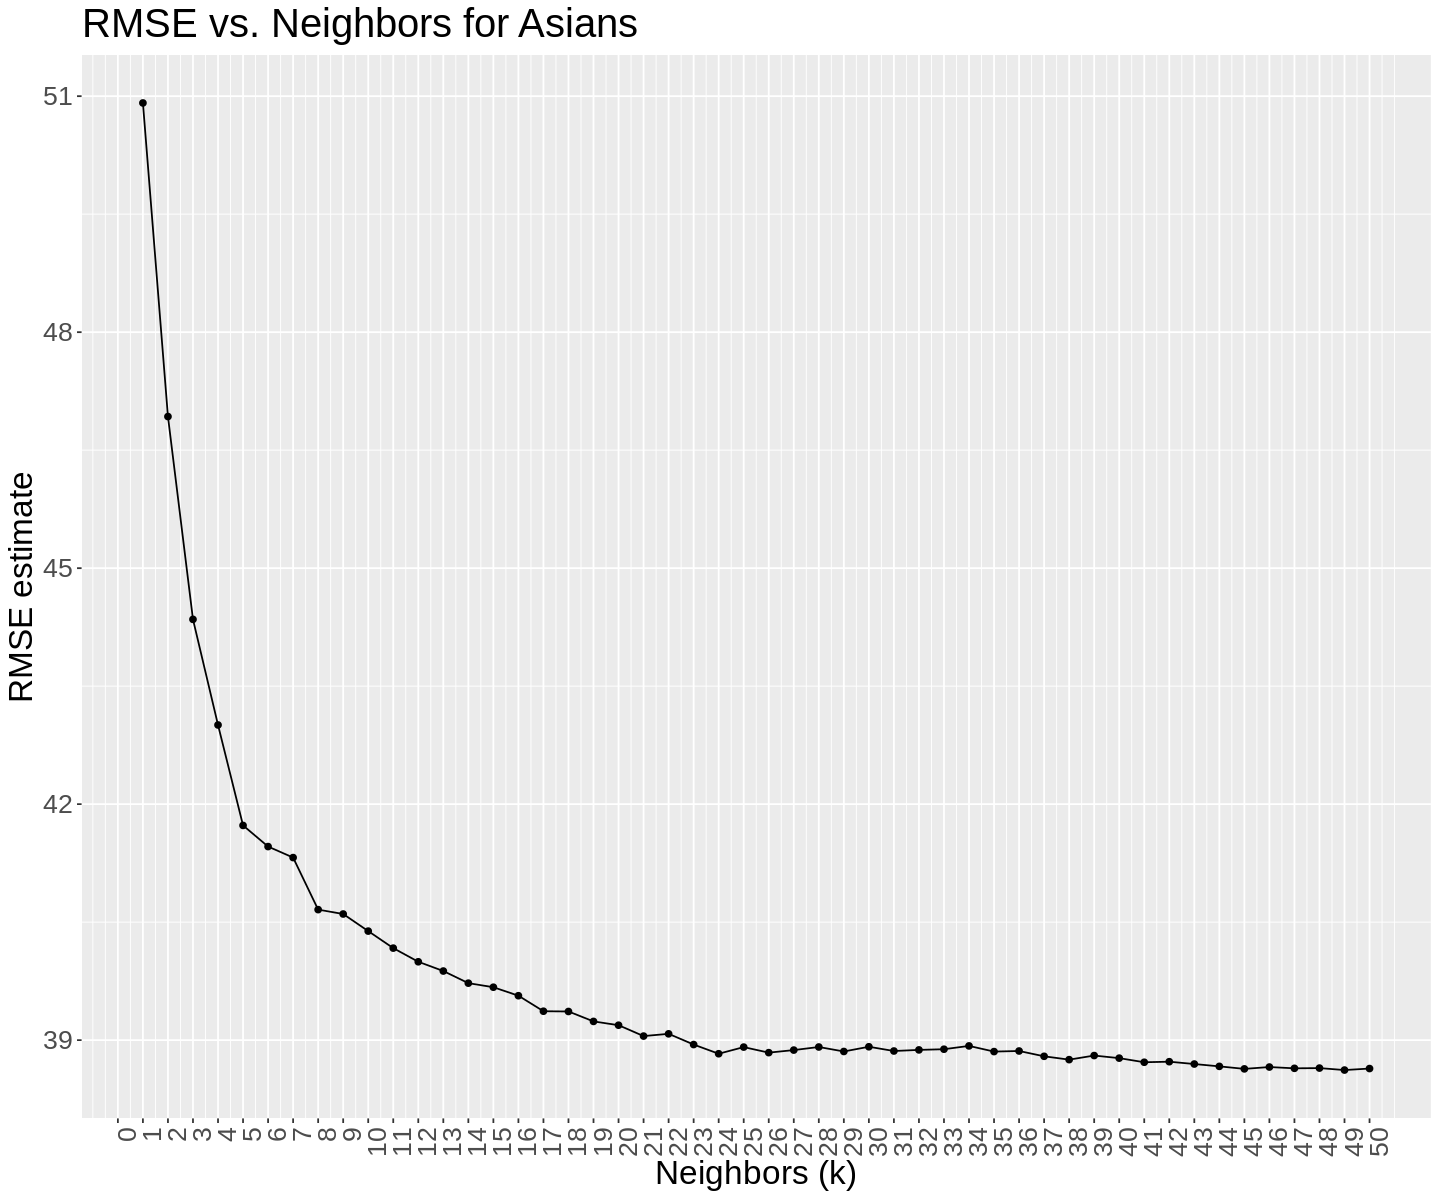

In [28]:
asian_k_plot <- asian_knn_metrics |>
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors (k)", y = "RMSE estimate", title = "RMSE vs. Neighbors for Asians") +
                scale_x_continuous(breaks = seq(0, 50, by = 1)) +
                theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 20))

asian_k_plot

**Figure 14 - Plot of RMSE against k for Asian population**

RMSE significantly decreases from k = 1 to k = 5, and plateaus at RMSE = 39, a value similar to the linear model (**Figure 14**). The optimal k value is 25, as neighboring k values have similar RMSE values and k is comparatively small.

Lastly, we build our models for Hispanics.

In [46]:
hisp_lin_recipe <- recipe(ViolentCrimesPerPop ~ racePctHisp, data = crime_training)

hisp_lin_fit <- workflow() |>
                add_recipe(hisp_lin_recipe) |>
                add_model(lin_spec) |>
                fit(data = crime_training)

hisp_lin_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)  racePctHisp  
    28.6855       0.3821  


**Figure 15 - Coefficients for the linear model for the Hispanic population**

In [52]:
hisp_lin_rmse <- hisp_lin_fit |>
            predict(crime_training) |>
            bind_cols(crime_training) |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse") |>
            select(.estimate) |>
            pull()

hisp_lin_rmse

[1] 38.01461

**Figure 16 - Linear model RMSE for the Hispanic population**

The intercept is 28.69 violent crimes per 100k, with a 0.38 increase in violent crimes per 100k per percentage increase in Hispanic population. This indicates a small total increase in violent crime over the population range 0%-100%, similar to Asians (**Figures 15, 12**). From **Figure 5**, outliers seem to have little effect on the model. The RMSE of 38.01 is also very high compared to the model coefficients (**Figures 16, 15**), meaning that predictions will have high uncertainty.

We build the k-nn model similarly to the previous models, and collect the RMSE for each k.

In [60]:
hisp_knn_recipe <- recipe(ViolentCrimesPerPop ~ racePctHisp, data = crime_training) |>
                    step_center(all_predictors()) |>
                    step_scale(all_predictors())

hisp_knn_metrics <- workflow() |>
                add_recipe(hisp_knn_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = vfold, grid = kvals) |>
                collect_metrics() |>
                filter(.metric == "rmse") |>
                select(neighbors, mean)

The resulting RMSE against each k is shown below.

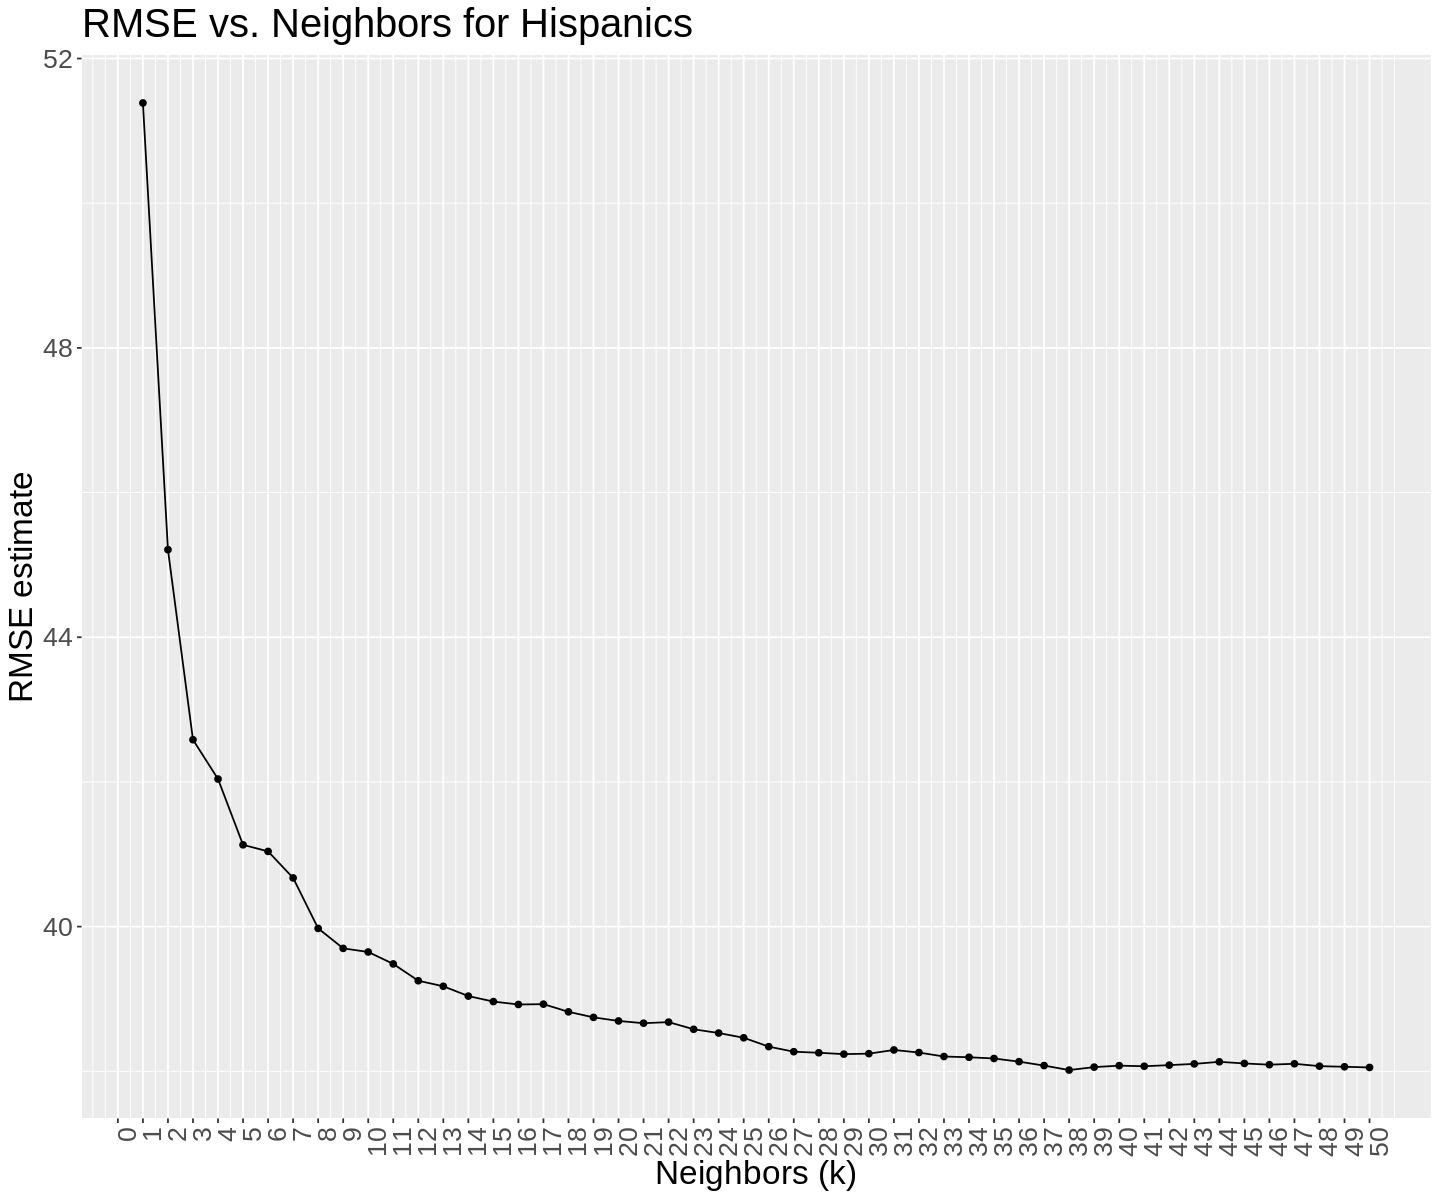

In [31]:
hisp_k_plot <- hisp_knn_metrics |>
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors (k)", y = "RMSE estimate", title = "RMSE vs. Neighbors for Hispanics") +
                scale_x_continuous(breaks = seq(0, 50, by = 1)) +
                theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 20))

hisp_k_plot

**Figure 17 - Plot of RMSE against k for Hispanic population**

RMSE decreases most significantly from k = 1 to k = 8, eventually approaching RMSE = 38, a value similar to the linear model (**Figures 17, 16**). The optimal k value is k = 15, as k is small and neighboring values do not change much.

There are advantages and disadvantages to linear models over k-nn models. However, the RMSE for the linear models are slightly lower, and outliers seem to not affect the models significantly. In addition, the optimal k values chosen for the k-nn models were limited by the fact that k-nn regression is computationally intensive for large k. Because of the size of our training set, the linear models seem more appropriate.

### REGRESSION RESULTS

Using the linear models, we now predict on our testing set and calculate the RMSPE for each race, beginning with Blacks.

In [32]:
black_preds <- black_lin_fit |>
            predict(crime_testing) |>
            bind_cols(crime_testing)

black_rmspe <- black_preds |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse") |>
            select(.estimate) |>
            pull()

black_rmspe

[1] 40.56445

**Figure 18 - Linear model RMSPE for the Black population**

The RMSPE of 40.56 is reasonably close to the RMSE of 36.58, so the model generalizes well (**Figures 18, 7**). We visualize the regression line on our testing set below.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 23 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 22 rows containing missing values (geom_point).”


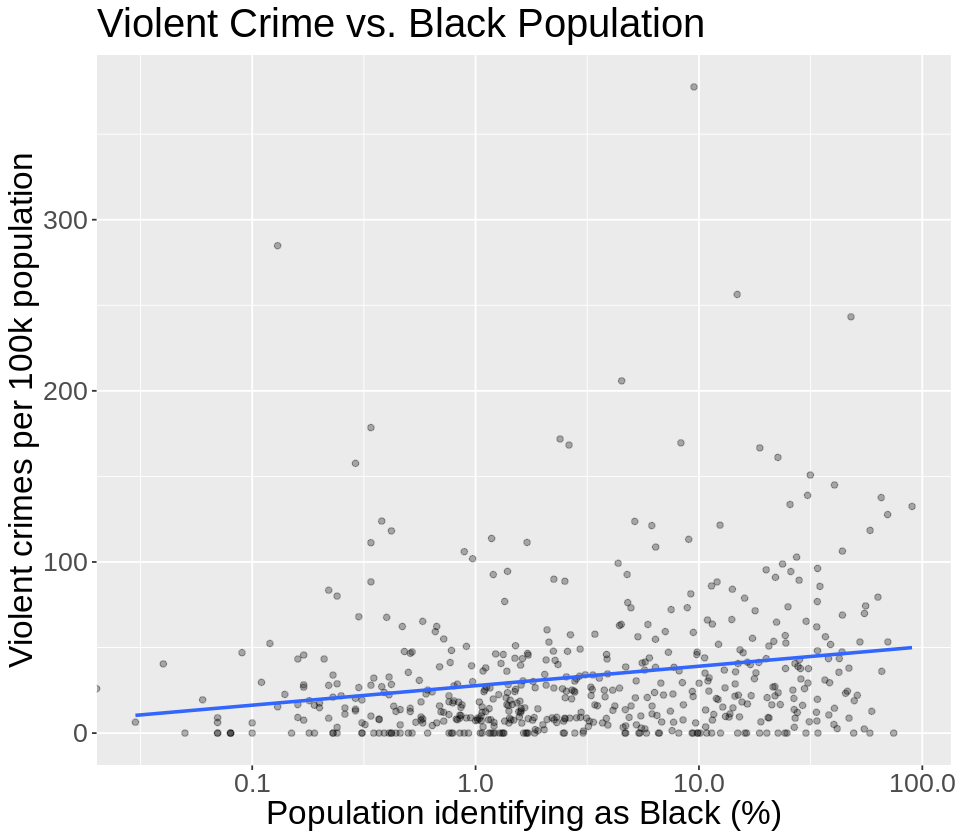

In [33]:
options(repr.plot.width = 8, repr.plot.height = 7)

black_pred_plot <- black_preds |>
                    ggplot(aes(x = racepctblack, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population identifying as Black (%)",
                         y = "Violent crimes per 100k population",
                         title = "Violent Crime vs. Black Population") +
                    geom_smooth(method = "lm", se = FALSE) +
                    scale_x_log10() +
                    theme(text = element_text(size = 20))

black_pred_plot

**Figure 19 - Regression plot for the Black population**

As expected, the regression line shows an increasing relationship, accounting for the majority of the points which have low violent crime values (**Figure 19**).

Now, we predict on our testing set for Whites, calculating the RMSPE and visualizing the regression.

In [34]:
white_preds <- white_lin_fit |>
            predict(crime_testing) |>
            bind_cols(crime_testing)

white_rmspe <- white_preds |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse") |>
            select(.estimate) |>
            pull()

white_rmspe

[1] 39.45704

**Figure 20 - Linear model RMSPE for the White population**

Compared to the RMSE of 35.98, the RMSPE of 39.46 is fairly similar, so our model generalizes well (**Figures 20, 10**).

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 102 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 22 rows containing missing values (geom_point).”


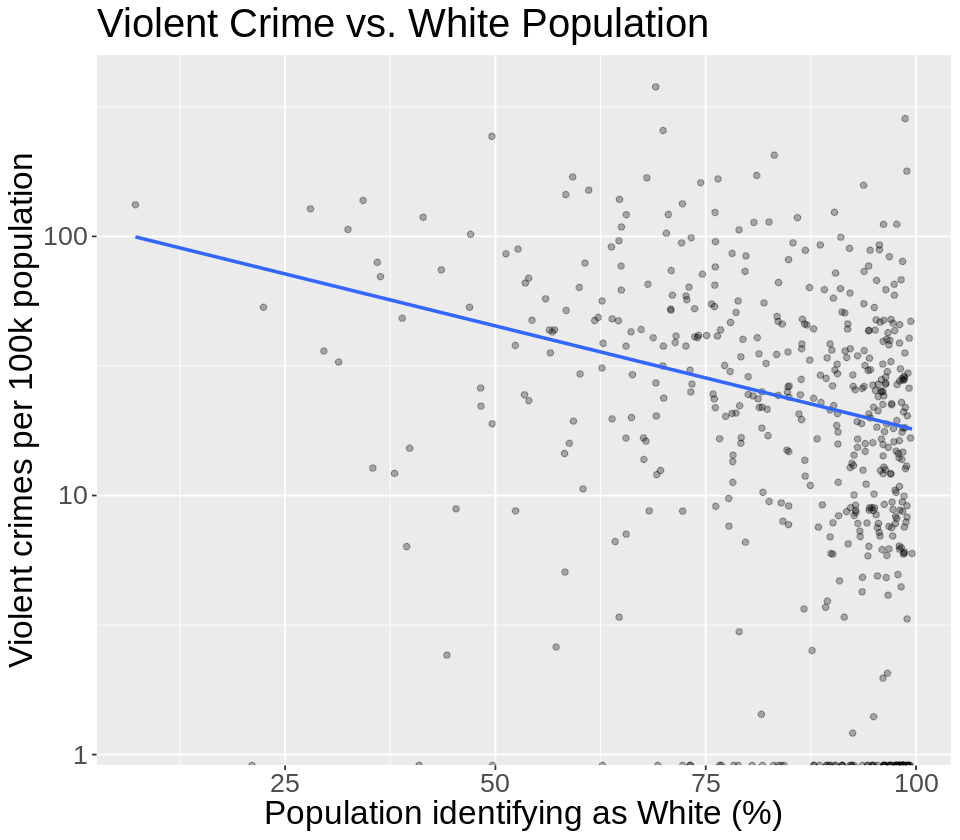

In [35]:
white_pred_plot <- white_preds |>
                    ggplot(aes(x = racePctWhite, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population identifying as White (%)",
                         y = "Violent crimes per 100k population",
                         title = "Violent Crime vs. White Population") +
                    geom_smooth(method = "lm", se = FALSE) +
                    scale_x_continuous() +
                    scale_y_log10() +
                    theme(text = element_text(size = 20))

white_pred_plot

**Figure 21 - Regression plot for the White population**

The regression line indicates a decreasing relationship, and accounts for most of the points (**Figure 21**).

We now predict on our testing set and calculate the RMSPE for Asians.

In [36]:
asian_preds <- asian_lin_fit |>
            predict(crime_testing) |>
            bind_cols(crime_testing)

asian_rmspe <- asian_preds |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse") |>
            select(.estimate) |>
            pull()

asian_rmspe

[1] 41.4152

**Figure 22 - Linear model RMSPE for the Asian population**

The model generalizes well as the RMSPE of 41.42 is slightly greater than the RMSE of 38.43 (**Figures 22, 13**). We plot the regression results for Asians below.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 22 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 22 rows containing missing values (geom_point).”


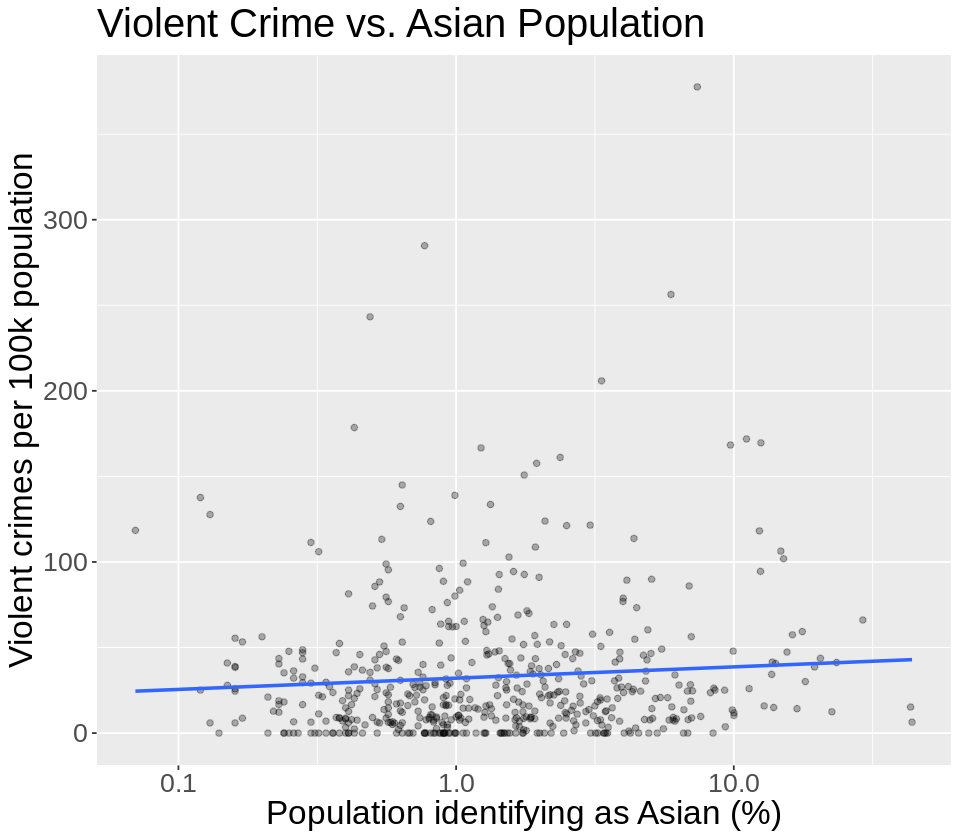

In [37]:
asian_pred_plot <- white_preds |>
                    ggplot(aes(x = racePctAsian, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population identifying as Asian (%)",
                         y = "Violent crimes per 100k population",
                         title = "Violent Crime vs. Asian Population") +
                    geom_smooth(method = "lm", se = FALSE) +
                    scale_x_log10() +
                    theme(text = element_text(size = 20))

asian_pred_plot

**Figure 23 - Regression plot for the Asian population**

Our regression line shows an increasing relationship, passes through most of the points, and is not influenced by outliers (**Figure 23**).

Lastly, we calculate the RMSPE for Hispanics.

In [38]:
hisp_preds <- hisp_lin_fit |>
            predict(crime_testing) |>
            bind_cols(crime_testing)

hisp_rmspe <- hisp_preds |>
            metrics(truth = ViolentCrimesPerPop, estimate = .pred) |>
            filter(.metric == "rmse") |>
            select(.estimate) |>
            pull()

hisp_rmspe

[1] 40.94262

**Figure 24 - Linear model RMSPE for the Hispanic population**

The RMSPE of about 40.94 is similar to the RMSE of  38.01, so the linear model generalizes well (**Figures 24, 16**). We visualize the regression results below.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 22 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 22 rows containing missing values (geom_point).”


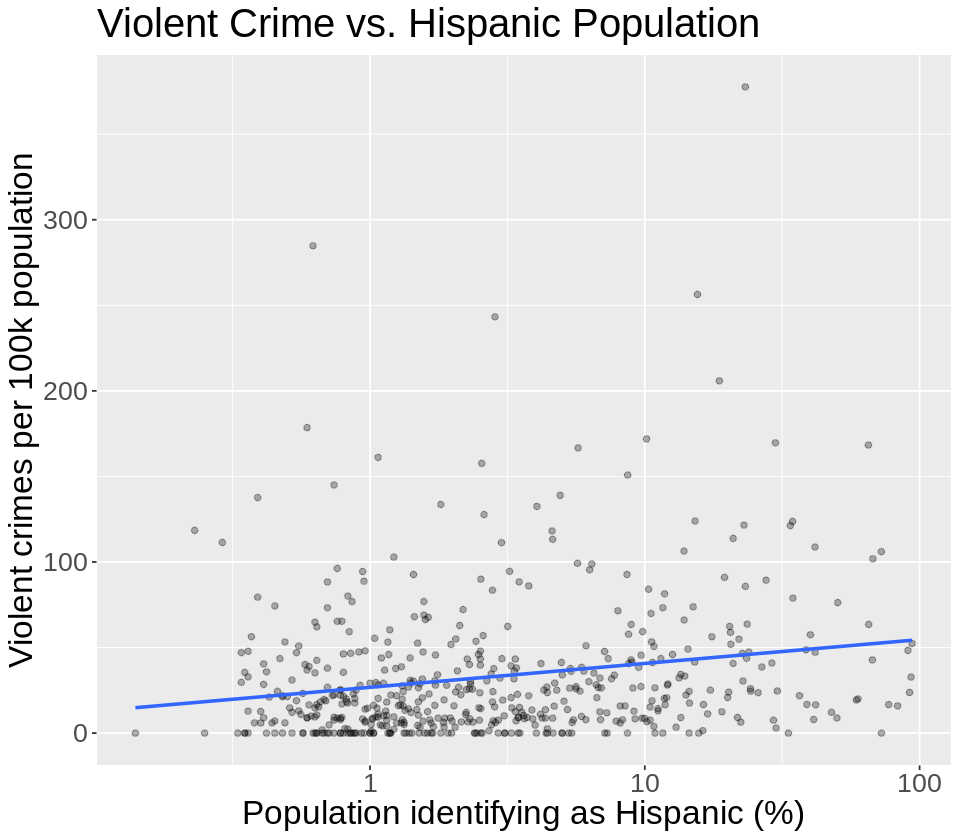

In [39]:
hisp_pred_plot <- white_preds |>
                    ggplot(aes(x = racePctHisp, y = ViolentCrimesPerPop)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population identifying as Hispanic (%)",
                         y = "Violent crimes per 100k population",
                         title = "Violent Crime vs. Hispanic Population") +
                    geom_smooth(method = "lm", se = FALSE) +
                    scale_x_log10() +
                    theme(text = element_text(size = 20))

hisp_pred_plot

**Figure 25 - Regression plot for the Hispanic population**

The regression line shows an increasing relationship, accounts for the majority of points, and is not affected by outliers (**Figure 25**).

### SUMMARY OF FINDINGS AND SIGNIFICANCE

We hypothesized that violent crime in predominantly white communities will be lower and higher in predominantly minority communities, based on our preliminary plots and previous research (Bonczar & Beck, 1997).

Our analysis supports our hypothesis, considering we found a decrease in violent crime per percentage increase in White population and an increase in violent crime per percentage increase in Black, Asian and Hispanic identifying population. Because of the relatively high RMSPE for all races, we cannot predict violent crime in a new community with certainty, but from the model coefficients, we can predict that communities with a large Black population will experience significantly more violent crime than a smaller Black population and vice versa for Whites (**Figures 18, 20**). Meanwhile, large Hispanic or Asian communities will experience a somwehat smaller increase in violent crime than small Hispanic or Asian communities (**Figures 22, 24**).

This information is important as it shows the disparity in violent crimes between predominantly White communities and minority communities, which may correlate with an overrepresentation in the justice system by certain races. If race can be a predictor of crimes, it may only reinforce stereotypes placed on certain racial groups.

However, our question is predictive and not causal. We cannot say that whether race causes a higher incidence of violent crime. There may also be other predictors of violent crime. For example, our summary statistics indicated a large proportion of cities in the dataset. This may lead to additional questions of whether community type, size, education or income can predict violent crime as well.

### REFERENCES

Bonczar, T. P., & Beck, A. J. (1997, March 6). Lifetime likelihood of going to state or Federal Prison. Bureau of Justice Statistics. Retrieved October 28, 2022, from https://bjs.ojp.gov/library/publications/lifetime-likelihood-going-state-or-federal-prison 

Dua, D., & Graff, C. (2019). Communities and crime unnormalized data set. UCI Machine Learning Repository. Retrieved October 27, 2022, from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

Farrell, C. R., & Lee, B. A. (2016, December 26). No-majority communities: Racial diversity and change at the local level. Urban affairs review (Thousand Oaks, Calif.). Retrieved October 27, 2022, from https://pubmed.ncbi.nlm.nih.gov/31814691/

U.S. Census Bureau. U.S. Department of Commerce. (2022, October 13). Retrieved October 27, 2022, from https://www.commerce.gov/bureaus-and-offices/census

Weidner, R. R., & Schultz, J. (2019, August 13). Examining the relationship between U.S. incarceration rates and population health at the county level. SSM - population health. Retrieved October 27, 2022, from https://pubmed.ncbi.nlm.nih.gov/31485477/